In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D2-Conrad/S1/Office_Conrad-S1.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:1440]
test_data = df.iloc[1440:]

In [5]:
len(train_data),len(test_data)

(1440, 720)

In [6]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data),24):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i:i+24, 0])
        #print(y)
   
    
    return [X, y]

In [7]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [8]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [9]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [10]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [11]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (59, 24, 1)
y_train.shape =  (59, 24)
X_test.shape =  (29, 24, 1)
y_test.shape =  (29, 24)


In [12]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [13]:
# define model
model = Sequential()
model.add(LSTM(24, activation='tanh', input_shape=(X_train.shape[1],1)))
model.add(Dense(24))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24)                2496      
                                                                 
 dense (Dense)               (None, 24)                600       
                                                                 
Total params: 3,096
Trainable params: 3,096
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="adam",loss="MSE")
model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 128.2968
Epoch 2/300
1/1 [==============================] - 0s 20ms/step - loss: 127.9614
Epoch 3/300
1/1 [==============================] - 0s 29ms/step - loss: 127.6271
Epoch 4/300
1/1 [==============================] - 0s 23ms/step - loss: 127.2936
Epoch 5/300
1/1 [==============================] - 0s 20ms/step - loss: 126.9606
Epoch 6/300
1/1 [==============================] - 0s 21ms/step - loss: 126.6283
Epoch 7/300
1/1 [==============================] - 0s 20ms/step - loss: 126.2966
Epoch 8/300
1/1 [==============================] - 0s 24ms/step - loss: 125.9656
Epoch 9/300
1/1 [==============================] - 0s 20ms/step - loss: 125.6349
Epoch 10/300
1/1 [==============================] - 0s 24ms/step - loss: 125.3045
Epoch 11/300
1/1 [==============================] - 0s 20ms/step - loss: 124.9741
Epoch 12/300
1/1 [==============================] - 0s 21ms/step - loss: 124.6437
Epoch 13/300
1/1 [=========

In [15]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt

In [17]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [18]:
print('Root Mean Squared Error for LSTM Model for training is:',rmse_train)
print('Root Mean Squared Error for LSTM Model for testing is:',rmse_test)
print('Mean Absolute Error for LSTM Model for training is:',mae_train)
print('Mean Absolute Error for LSTM Model for testing is:',mae_test)
print('MAPE for LSTM Model for training is:',mape_train)
print('MAPE for LSTM Model for testing is:',mape_test)

Root Mean Squared Error for LSTM Model for training is: 4.494832606214124
Root Mean Squared Error for LSTM Model for testing is: 3.9043646454808787
Mean Absolute Error for LSTM Model for training is: 3.797821279899041
Mean Absolute Error for LSTM Model for testing is: 3.2320280480055246
MAPE for LSTM Model for training is: 0.31301938280313657
MAPE for LSTM Model for testing is: 0.27634525488960643


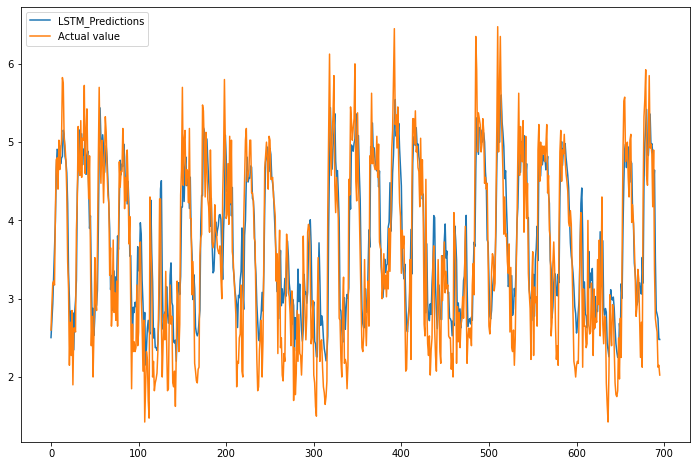

In [ ]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([2.5999999]), array([2.5035863], dtype=float32))

In [ ]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([0.09641361]), array([0.21303678]), array([0.26548505]), array([-0.06789947]), array([-0.48667121]), array([0.10985613]), array([0.12188387]), array([-0.10912943]), array([-0.49151278]), array([0.36169434]), array([-0.30618668]), array([0.15321589]), array([0.22698736]), array([1.0072608]), array([0.597507]), array([-0.05424738]), array([0.13220072]), array([0.01989889]), array([-0.26155233]), array([-0.7423315]), array([-0.21436048]), array([-0.85979843]), array([0.11817575]), array([-0.56704521]), array([0.2572453]), array([-0.91961253]), array([0.27822828]), array([-0.18952513]), array([-0.401016]), array([0.63857079]), array([-0.09394407]), array([0.49796581]), array([-0.50710344]), array([-0.26949787]), array([0.46609735]), array([-0.55734491]), array([0.34122324]), array([0.11430931]), array([0.88739204]), array([-0.53271818]), array([0.53561831]), array([0.6116724]), array([-0.16007137]), array([-0.16046906]), array([0.9272151]), array([-0.38448405]), array([-0.89163971])

In [ ]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([1.7513454]), array([-1.82914472]))

In [ ]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [ ]:
len(neg),len(pos)

(435, 261)